In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report


data=pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")

print(data.shape)

data.head()




(10000, 18)


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
data.isnull().sum()

,0
objid,0
ra,0
dec,0
u,0
g,0
r,0
i,0
z,0
run,0
rerun,0


In [5]:
data.drop(["objid","specobjid"],axis="columns",inplace=True)

data.head(8)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,STAR,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,GALAXY,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,STAR,0.000315,3306,54922,515


In [6]:
print(data.shape)

data.info()

data.describe()

(10000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


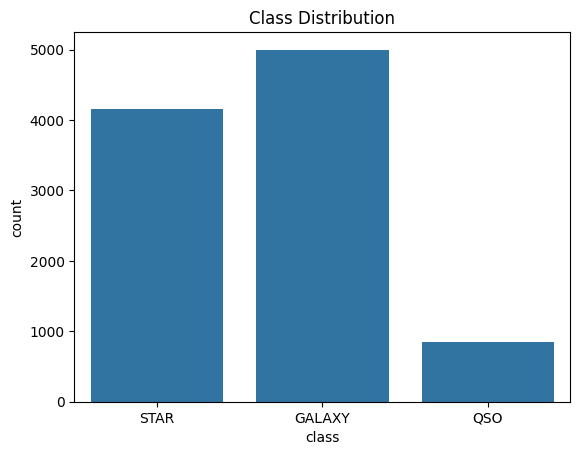

In [8]:
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.show()

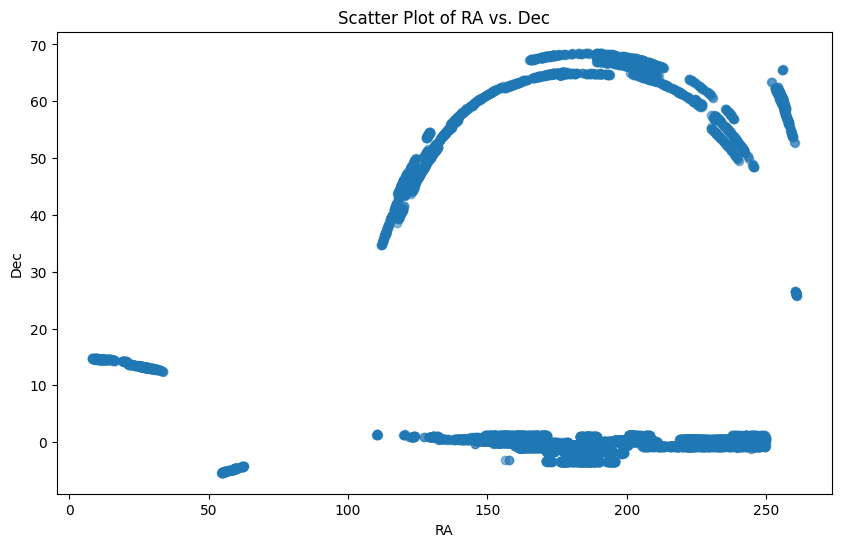

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(data['ra'], data['dec'], alpha=0.5)
plt.title('Scatter Plot of RA vs. Dec')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

This scatter plot shows the distribution of celestial objects in the sky based on their Right Ascension (RA) and Declination (Dec). Insight: It helps identify patterns or clusters of objects and can reveal areas with higher densities of celestial objects.

These histograms display the frequency distribution of magnitudes for each of the u, g, r, i, z bands. Insight: They help understand the range and common values of magnitudes in each band, indicating how bright or faint the objects are in different wavelengths.

Box plots compare the distribution of magnitudes across different object
classes (e.g., STAR, GALAXY, QSO). Insight: They highlight the central tendency, variability, and presence of outliers in magnitudes for each class, showing how different types of objects vary in brightness.

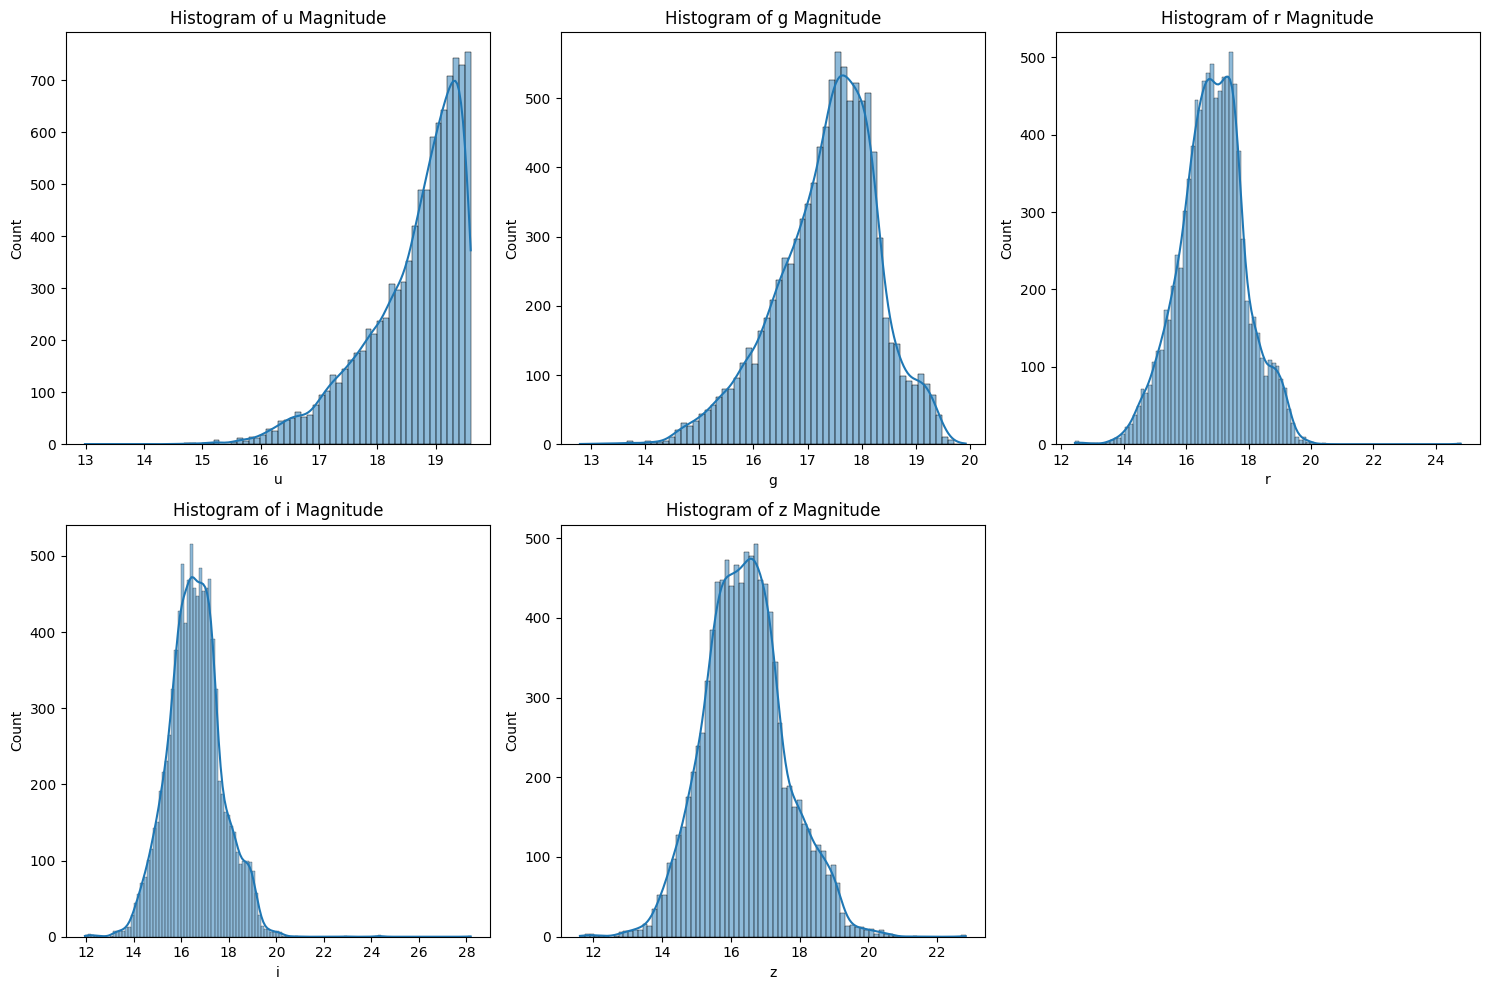

In [10]:
magnitude_columns = ['u', 'g', 'r', 'i', 'z']
plt.figure(figsize=(15, 10))
for i, col in enumerate(magnitude_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col} Magnitude')
plt.tight_layout()
plt.show()

In [11]:
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])
data.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512


In [12]:
data['u_log'] = np.log(data['u'] + 1)
data.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid,u_log
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491,3.019159
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541,2.978729
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513,3.014700
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510,2.932013
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512,2.920483


In [13]:
data = data.drop('u', axis=1)
data.head()

,ra,dec,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid,u_log
0,183.531326,0.089693,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491,3.019159
1,183.598370,0.135285,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541,2.978729
2,183.680207,0.126185,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513,3.014700
3,183.870529,0.049911,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510,2.932013
4,183.883288,0.102557,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512,2.920483


In [14]:
X = data.drop('class', axis=1)
y = data['class']
X

,ra,dec,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid,u_log
0,183.531326,0.089693,17.04240,15.94699,15.50342,15.22531,752,301,4,267,-0.000009,3306,54922,491,3.019159
1,183.598370,0.135285,17.21449,16.67637,16.48922,16.39150,752,301,4,267,-0.000055,323,51615,541,2.978729
2,183.680207,0.126185,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0.123111,287,52023,513,3.014700
3,183.870529,0.049911,16.60272,16.16116,15.98233,15.90438,752,301,4,269,-0.000111,3306,54922,510,2.932013
4,183.883288,0.102557,16.26342,16.43869,16.55492,16.61326,752,301,4,269,0.000590,3306,54922,512,2.920483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,0.027583,447,51877,246,2.986579
9996,131.306083,51.671341,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,0.117772,447,51877,228,2.958682
9997,131.552562,51.666986,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,-0.000402,7303,57013,622,2.983568
9998,131.477151,51.753068,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,0.014019,447,51877,229,2.989859


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
pca = PCA(n_components=5)
ugriz = pca.fit_transform(X_scaled[:, [X.columns.get_loc(c) for c in ['u_log', 'g', 'r', 'i', 'z']]])
data = pd.concat((data, pd.DataFrame(ugriz)), axis=1)
data.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis=1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(ugriz, y, test_size=0.3, random_state=28)
data.head()

KNN_X_ugriz_df = pd.DataFrame(ugriz)
KNN_y_df = pd.DataFrame(y)

KNN_X_ugriz_df.to_csv('KNN_X_ugriz.csv', index=False)
KNN_y_df.to_csv('KNN_y.csv', index=False)

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

[2 0 0 2 0 0 0 2 2 2] 
 4345    2
5182    0
1597    0
4459    2
4168    0
1901    0
7738    0
1243    2
4445    2
8435    0
Name: class, dtype: int64

Accuracy: 93.10%

Prevalence of Galaxies (Class 0): 0.48933333333333334
Prevalence of Quasars (Class 1): 0.08533333333333333
Prevalence of Stars (Class 2): 0.42533333333333334


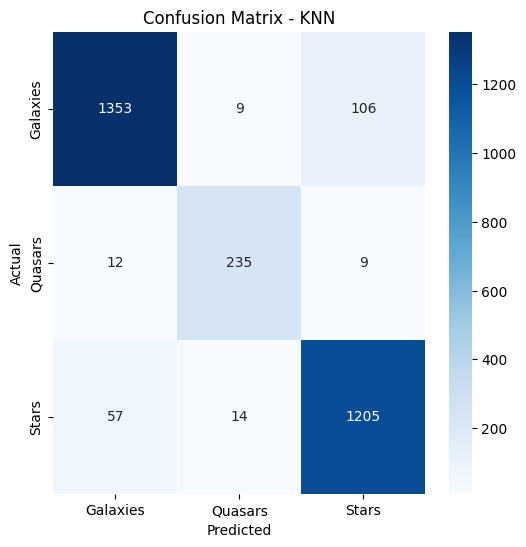


KNN Classifier - Classification Report:
              precision    recall  f1-score   support

    Galaxies       0.95      0.92      0.94      1468
     Quasars       0.91      0.92      0.91       256
       Stars       0.91      0.94      0.93      1276

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Make predictions with KNN
y_pred = knn.predict(X_test)

# Display first 10 predictions and true labels
print(y_pred[:10], '\n', y_test[:10])

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: {:.2f}%".format(accuracy * 100))

# Prevalence for each class
total_cases = len(y_test)
prevalence_galaxy = np.sum(y_test == 0) / total_cases
prevalence_quasar = np.sum(y_test == 1) / total_cases
prevalence_star = np.sum(y_test == 2) / total_cases

print("\nPrevalence of Galaxies (Class 0):", prevalence_galaxy)
print("Prevalence of Quasars (Class 1):", prevalence_quasar)
print("Prevalence of Stars (Class 2):", prevalence_star)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix using Seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Galaxies', 'Quasars', 'Stars'],
            yticklabels=['Galaxies', 'Quasars', 'Stars'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - KNN')
plt.show()

# Classification Report
print("\nKNN Classifier - Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Galaxies', 'Quasars', 'Stars']))


Best Hyperparameters:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation Accuracy: 93.20%

First 10 predictions: [2 0 0 2 0 0 0 2 2 0]
First 10 true labels: 4345    2
5182    0
1597    0
4459    2
4168    0
1901    0
7738    0
1243    2
4445    2
8435    0
Name: class, dtype: int64

Classification Report for Tuned KNN Model:
              precision    recall  f1-score   support

    Galaxies       0.96      0.92      0.94      1468
     Quasars       0.92      0.93      0.92       256
       Stars       0.92      0.95      0.93      1276

    accuracy                           0.94      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.94      0.94      0.94      3000



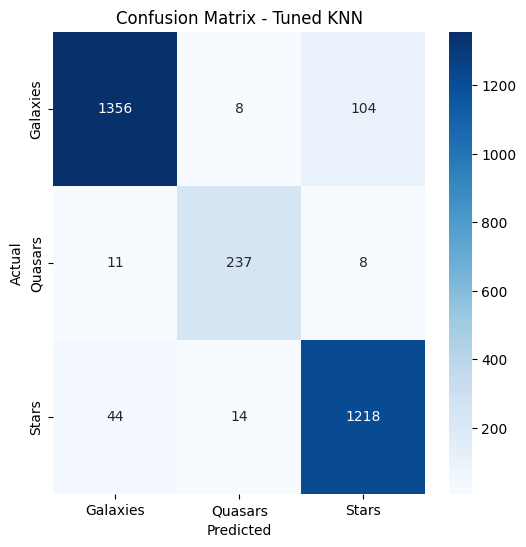

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to test
    'weights': ['uniform', 'distance'],  # Weights for prediction
    'metric': ['euclidean', 'manhattan', 'chebyshev'],  # Distance metrics to test
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Get the best model with the optimal hyperparameters
best_knn_model = grid_search.best_estimator_

# Make predictions with the tuned model
y_pred_tuned = best_knn_model.predict(X_test)

# Display first 10 predictions and true labels
print("\nFirst 10 predictions:", y_pred_tuned[:10])
print("First 10 true labels:", y_test[:10])

# Classification Report
print("\nClassification Report for Tuned KNN Model:")
print(classification_report(y_test, y_pred_tuned, target_names=['Galaxies', 'Quasars', 'Stars']))

# Confusion Matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

# Plot Confusion Matrix for the tuned KNN model
plt.figure(figsize=(6, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Galaxies', 'Quasars', 'Stars'],
            yticklabels=['Galaxies', 'Quasars', 'Stars'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Tuned KNN')
plt.show()


In [20]:
import pickle

with open('final_knn_solana.pkl', 'wb') as file:
    pickle.dump(best_knn_model, file)
